In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
!pip install yfinance
import yfinance as yf  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
stock = 'TSLA'
data = yf.download(stock,'2017-09-01','2022-09-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-09-01,23.741333,23.839333,23.579332,23.693333,23.693333,45742500
2017-09-05,23.586666,23.699333,23.059334,23.306000,23.306000,57526500
2017-09-06,23.299999,23.398666,22.770666,22.968666,22.968666,61371000
2017-09-07,23.065332,23.498667,22.896667,23.374001,23.374001,63588000
2017-09-08,23.266001,23.318666,22.820000,22.893333,22.893333,48952500


In [ ]:
data_to_train = data[:1000]
data_to_test = data[1000:]

In [ ]:
data_to_train.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-09-01,23.741333,23.839333,23.579332,23.693333,23.693333,45742500
2017-09-05,23.586666,23.699333,23.059334,23.306000,23.306000,57526500
2017-09-06,23.299999,23.398666,22.770666,22.968666,22.968666,61371000
2017-09-07,23.065332,23.498667,22.896667,23.374001,23.374001,63588000
2017-09-08,23.266001,23.318666,22.820000,22.893333,22.893333,48952500


In [ ]:
data_to_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-24,236.893326,238.406662,234.213333,236.163330,236.163330,39249300
2021-08-25,235.676666,238.990005,234.666672,237.066666,237.066666,37936800
2021-08-26,236.103333,238.466660,232.539993,233.720001,233.720001,39642900
2021-08-27,235.000000,238.333328,234.033340,237.306671,237.306671,41501400
2021-08-30,238.240005,243.666672,237.576660,243.636673,243.636673,55812600


In [ ]:
training_set = data_to_train.iloc[: , 3:4].values

In [ ]:
training_set

array([[ 23.69333267],
       [ 23.30599976],
       [ 22.96866608],
       [ 23.37400055],
       [ 22.89333344],
       [ 24.24600029],
       [ 24.18333244],
       [ 24.41533279],
       [ 25.1760006 ],
       [ 25.32066727],
       [ 25.66666794],
       [ 25.00666618],
       [ 24.92733383],
       [ 24.43199921],
       [ 23.40600014],
       [ 22.99933243],
       [ 23.01666641],
       [ 22.73133278],
       [ 22.63999939],
       [ 22.73999977],
       [ 22.76866722],
       [ 23.20933342],
       [ 23.6673336 ],
       [ 23.6886673 ],
       [ 23.79199982],
       [ 22.86266708],
       [ 23.70599937],
       [ 23.63999939],
       [ 23.71199989],
       [ 23.70466614],
       [ 23.37333298],
       [ 23.71666718],
       [ 23.9766674 ],
       [ 23.45400047],
       [ 23.00666618],
       [ 22.46800041],
       [ 22.4893322 ],
       [ 21.72266769],
       [ 21.74466705],
       [ 21.39133263],
       [ 21.33866692],
       [ 22.10199928],
       [ 21.40533257],
       [ 19

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))

training_data_scaled = sc.fit_transform(training_set)

In [ ]:
training_data_scaled.shape

(1000, 1)

In [ ]:
X_train = []
y_train = []

for i in range(60, 1000):
  X_train.append(training_data_scaled[i-60:i, 0])
  y_train.append(training_data_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# Building Model:

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.LSTM(units=50, return_sequences=True, 
                               input_shape=(X_train.shape[1], 1)))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_20 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_21 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_21 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_22 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_22 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_23 (LSTM)              (None, 50)               

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
modelo = model.fit(X_train, y_train, epochs=40, batch_size=32)

Epoch 1/40
30/30 [==============================] - 11s 121ms/step - loss: 0.0242
Epoch 2/40
30/30 [==============================] - 4s 118ms/step - loss: 0.0055
Epoch 3/40
30/30 [==============================] - 3s 114ms/step - loss: 0.0044
Epoch 4/40
30/30 [==============================] - 4s 117ms/step - loss: 0.0051
Epoch 5/40
30/30 [==============================] - 4s 118ms/step - loss: 0.0035
Epoch 6/40
30/30 [==============================] - 4s 126ms/step - loss: 0.0034
Epoch 7/40
30/30 [==============================] - 4s 117ms/step - loss: 0.0038
Epoch 8/40
30/30 [==============================] - 3s 115ms/step - loss: 0.0037
Epoch 9/40
30/30 [==============================] - 4s 143ms/step - loss: 0.0034
Epoch 10/40
30/30 [==============================] - 3s 113ms/step - loss: 0.0032
Epoch 11/40
30/30 [==============================] - 3s 113ms/step - loss: 0.0030
Epoch 12/40
30/30 [==============================] - 4s 120ms/step - loss: 0.0027
Epoch 13/40
30/30 [=====

In [ ]:
model.save('model', include_optimizer=True)

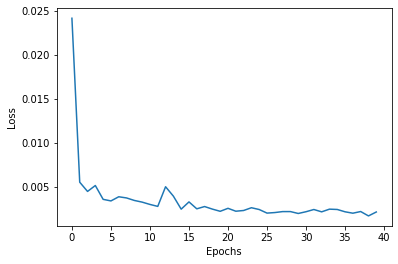

In [ ]:
plt.plot(modelo.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
real_stock_price = data_to_test.iloc[: , 3:4].values

In [ ]:
data_to_test

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-24,236.893326,238.406662,234.213333,236.163330,236.163330,39249300
2021-08-25,235.676666,238.990005,234.666672,237.066666,237.066666,37936800
2021-08-26,236.103333,238.466660,232.539993,233.720001,233.720001,39642900
2021-08-27,235.000000,238.333328,234.033340,237.306671,237.306671,41501400
2021-08-30,238.240005,243.666672,237.576660,243.636673,243.636673,55812600
...,...,...,...,...,...,...
2022-08-25,302.359985,302.959991,291.600006,296.070007,296.070007,53230000
2022-08-26,297.429993,302.000000,287.470001,288.089996,288.089996,57163900
2022-08-29,282.829987,287.739990,280.700012,284.820007,284.820007,41864700


In [ ]:
dataset_total = pd.concat([data_to_test['Close'], data_to_test['Close']], axis=0)
inputs = dataset_total[len(dataset_total) - len(data_to_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 319):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price = model.predict(X_test)

In [ ]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


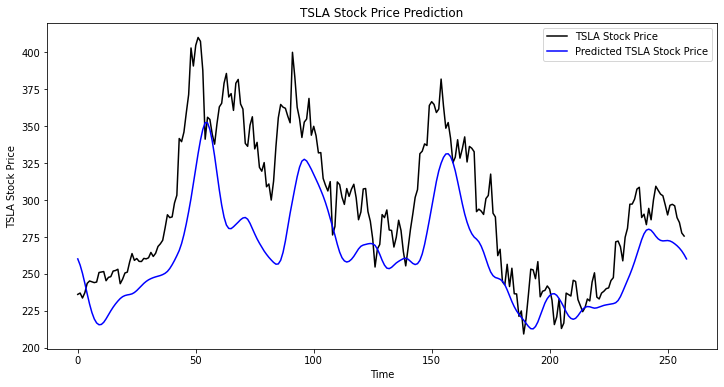

In [ ]:
plt.figure(figsize=(12, 6))
plt.fontname = "Open Sans"

plt.plot(real_stock_price, color='black', label=stock + ' Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted '+stock+' Stock Price')

plt.title(stock+' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(stock + ' Stock Price')
plt.savefig(stock + '_stock_graph.svg',bbox_inches="tight", pad_inches=0.2, transparent=True)
plt.legend()
plt.show()

In [ ]:
model.save('model.h5')

In [ ]:
#possibly have a data included as well for the input along with the ticker symbol